In [ ]:
# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
# information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
# resting blood pressure, serum cholesterol, and maximum heart rate achieved.
# Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
# usp=share_link
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
# numerical features if necessary.
# Q2. Split the dataset into a training set (70%) and a test set (30%).
# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
# tree. Use the default values for other hyperparameters.
# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
# disease risk. Visualise the feature importances using a bar chart.
# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
# Q7. Report the best set of hyperparameters found by the search and the corresponding performance
# metrics. Compare the performance of the tuned model with the default model.
# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
# limitations of the model for predicting heart disease risk.

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = df.drop(['target'],axis=1)
y = df.target

In [ ]:
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
# numerical features if necessary.

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Q2. Split the dataset into a training set (70%) and a test set (30%).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [10]:
scale_var = ["age","trestbps","thalach","oldpeak"]

In [11]:
X_train = scale.fit_transform(X_train,y_train)

In [12]:
X_test = scale.transform(X_test)

In [13]:
# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
# tree. Use the default values for other hyperparameters.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,oob_score=True)

In [16]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

In [17]:
y_pred = clf.predict(X_test)

In [38]:
# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
accuracy_score(y_test,y_pred)

0.8241758241758241

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [39]:
# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart

In [21]:
clf.feature_importances_

array([0.09071197, 0.03504005, 0.12691247, 0.06743037, 0.0696581 ,
       0.0126612 , 0.01594345, 0.11480162, 0.07055326, 0.11172191,
       0.05000325, 0.13090505, 0.1036573 ])

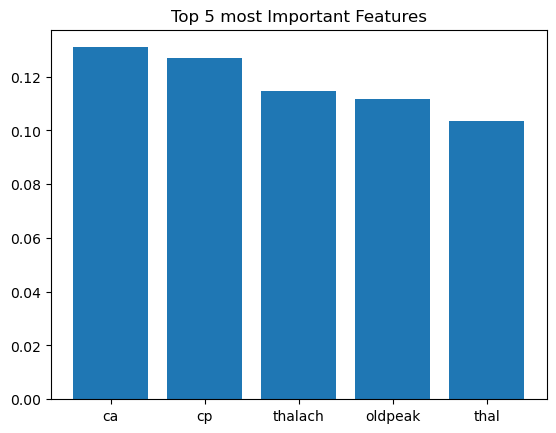

In [22]:
import numpy as np
import matplotlib.pyplot as plt
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

top_n = 5
top_featurs = features[indices][:top_n]
top_importances = importances[indices][:top_n]

plt.bar(range(top_n) , top_importances, tick_label = top_featurs)
plt.title('Top 5 most Important Features')
plt.show()

In [23]:
# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
        'n_estimators': [50, 100, 200],
         'max_depth':[5,10,15],
          'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]
}

In [27]:
grid = GridSearchCV(clf,param_grid=param_grid,cv = 5,scoring = "accuracy",verbose=3)

In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.714 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, oob_score=True,
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [29]:
# Q7. Report the best set of hyperparameters found by the search and the corresponding performance
# metrics. Compare the performance of the tuned model with the default model.

grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
y_pred_grid = grid.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred_grid)

0.8351648351648352

In [32]:
accuracy_score(y_test,y_pred_grid)-accuracy_score(y_test,y_pred)

0.010989010989011061

In [33]:
# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
# limitations of the model for predicting heart disease risk.

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#choose the two most important features
feature_1 = "cp"
feature_2 = "thalach"

In [35]:
# Plot the decision boundaries on a scatter plot
x_min, x_max = X.cp.min() , X.cp.max()
y_min, y_max = X.thalach.min(), X.thalach.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

In [ ]:
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[feature_1], X_test[feature_2], c=y_test, alpha=0.8)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Random Forest Classifier Decision Boundaries")
plt.show()
 